<a href="https://colab.research.google.com/github/017mori/FarmAI/blob/master/arroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise sobre o preço médio de arroz no RG vs Produtividade no RG




In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Para as regreções
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D




##Importando os bancos de dados


In [93]:
#Bancos de dados de Alegrete, cidade de RG
url = "https://raw.githubusercontent.com/017mori/FarmAI/master/ALEGRETE.csv"
alegrete_df = pd.read_csv(url, sep =";", decimal=",")
alegrete_df.head()

,DATA,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
0,01/11/2019,0.7262,0.2738,78,477,15.88,37.4,-3.2,45.5056,45.3202
1,01/12/2019,0.5767,0.4233,76,474,18.43,37.4,1.7,45.9425,45.2417
2,01/01/2020,0.6732,0.3268,77,479,20.88,39.3,3.2,46.9230,46.1679
3,01/02/2020,0.4276,0.5724,77,502,23.14,39.3,8.8,48.6878,47.8821
4,01/03/2020,0.2363,0.7637,83,358,24.15,39.3,8.6,49.5096,49.2383


#Analise do banco de dados



In [ ]:
alegrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA                     9 non-null      object 
 1   PRODUTIVIDADE_FINAL      9 non-null      float64
 2   PERDA_FINAL              9 non-null      float64
 3   TOTAL_DE_DIAS_SEM_CHUVA  9 non-null      int64  
 4   CHUVA_DO_PERIODO         9 non-null      int64  
 5   TEMPERATURA_MEDIA        9 non-null      float64
 6   MAIOR_TEMPERATURA_MAX    9 non-null      float64
 7   MENOR_TEMPERATURA_MIN    9 non-null      float64
 8   Estadual                 9 non-null      float64
 9   Nacional                 9 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 848.0+ bytes


#Analise descritiva dos dados

In [ ]:
alegrete_df.describe()

,PRODUTIVIDADE_FINAL,PERDA_FINAL,TOTAL_DE_DIAS_SEM_CHUVA,CHUVA_DO_PERIODO,TEMPERATURA_MEDIA,MAIOR_TEMPERATURA_MAX,MENOR_TEMPERATURA_MIN,Estadual,Nacional
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.437911,0.562089,84.555556,380.111111,21.212222,39.188889,4.177778,52.033400,50.916122
std,0.180555,0.180555,8.017342,108.060683,2.974902,1.064712,4.120612,6.489731,5.625598
min,0.236300,0.273800,76.000000,221.000000,15.880000,37.400000,-3.200000,45.505600,45.241700
25%,0.287100,0.423300,77.000000,331.000000,19.050000,39.300000,1.700000,46.923000,46.167900
50%,0.416300,0.583700,83.000000,358.000000,21.150000,39.300000,3.300000,49.509600,49.238300
75%,0.576700,0.712900,93.000000,477.000000,23.550000,40.000000,8.600000,56.039800,54.319500
max,0.726200,0.763700,95.000000,502.000000,24.680000,40.000000,8.800000,62.548100,60.312200


#Visualização dos dados

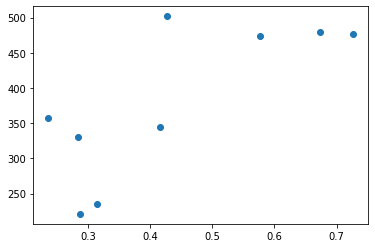

In [ ]:
plt.scatter(alegrete_df["PRODUTIVIDADE_FINAL"],alegrete_df["CHUVA_DO_PERIODO"])
plt.show()

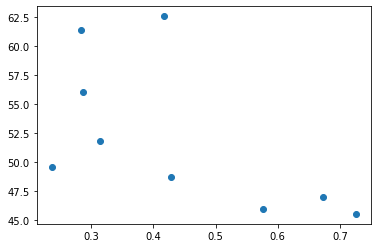

In [ ]:
plt.scatter(alegrete_df["PRODUTIVIDADE_FINAL"],alegrete_df["Estadual"])
plt.show()

#Regressão Linear

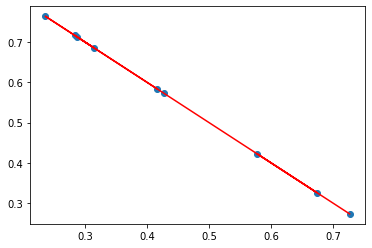

TypeError: ignored

In [105]:
for i in range(8):

  x = alegrete_df.iloc[:,1]
  y = alegrete_df.iloc[:,i+2]

  x = x[:, np.newaxis]
  y = y[:, np.newaxis]

  model = LinearRegression()
  model.fit(x, y)
  y_pred = model.predict(x)
  r_sq = model.score(x, y)

  plt.scatter(x, y)
  plt.plot(x, y_pred, color='r')
  plt.show()
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)

#Regreção Linear Multipla

In [127]:
y = alegrete_df.iloc[:,2]
x = alegrete_df.iloc[:,3:10]
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq 

0.9993376556382093

In [128]:
model.intercept_

3.829487874562121

In [129]:
model.coef_

array([ 0.0096925 ,  0.00172244,  0.21925384, -0.31898933, -0.07023409,
       -0.08128046,  0.14987444])

In [130]:
y_pred = model.predict(x)
y_pred

array([0.27702924, 0.42015058, 0.32331453, 0.57860441, 0.76068459,
       0.68228255, 0.72061857, 0.71184797, 0.58426757])

#Regressão Polinomial

In [135]:
for i in range(8):

  x = alegrete_df.iloc[:,1]
  y = alegrete_df.iloc[:,i+2]

  x_ = transformer.transform(x)

  x_
  model = LinearRegression().fit(x_, y)


NameError: ignored